# Beijing Air Quality

## Exploratory Data Analysis


### Import packages and data

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pylab import fill
%matplotlib inline
# Styling Guide
plt.style.use('fivethirtyeight')
sns.set_palette(sns.color_palette("cubehelix", n_colors=12))

df = pd.read_pickle('PKL/full.pkl')
#df = df.groupby('station').resample('D').mean()
df['Month'] = df.index.month
df['Year'] = df.index.year
df['Day'] = df.index.day


### Numerical Analysis

Before we go into the visualizations, let us take a look at the numerical breakdown of the data

In [83]:
df.describe(include = 'all')


,PM2.5,station,Month,Year,Day
count,16824.000000,16824,16824.000000,16824.000000,16824.000000
unique,NaN,12,NaN,NaN,NaN
top,NaN,Nongzhanguan,NaN,NaN,NaN
freq,NaN,1402,NaN,NaN,NaN
mean,141.265335,NaN,6.735378,2014.564194,15.748217
std,103.839580,NaN,3.356575,1.097534,8.809142
min,3.000000,NaN,1.000000,2013.000000,1.000000
25%,67.000000,NaN,4.000000,2014.000000,8.000000
50%,117.000000,NaN,7.000000,2015.000000,16.000000
75%,186.000000,NaN,10.000000,2016.000000,23.000000


In [84]:
df.head()

,PM2.5,station,Month,Year,Day
Date,,,,,
2013-03-01,16.0,Gucheng,3,2013,1
2013-03-02,98.0,Gucheng,3,2013,2
2013-03-03,150.0,Gucheng,3,2013,3
2013-03-04,83.0,Gucheng,3,2013,4
2013-03-05,228.0,Gucheng,3,2013,5


### Visual Analysis

## Looking at the monthly and yearly progression of the weather data

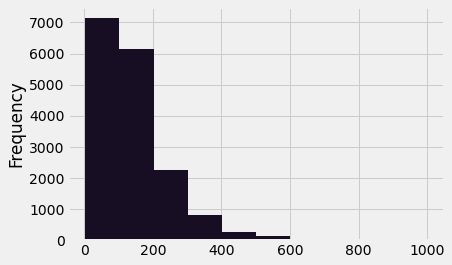

In [135]:
# non normal distribution

df['PM2.5'].plot.hist()

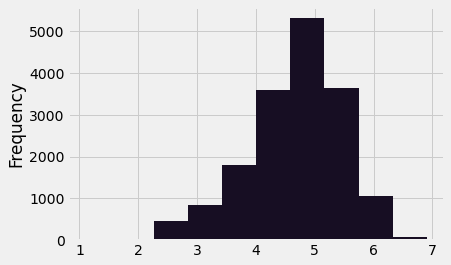

In [136]:
#it now has a normal distribution

np.log(df['PM2.5']).plot.hist()


In [87]:
df['log_PM2.5'] = np.log(df['PM2.5'])

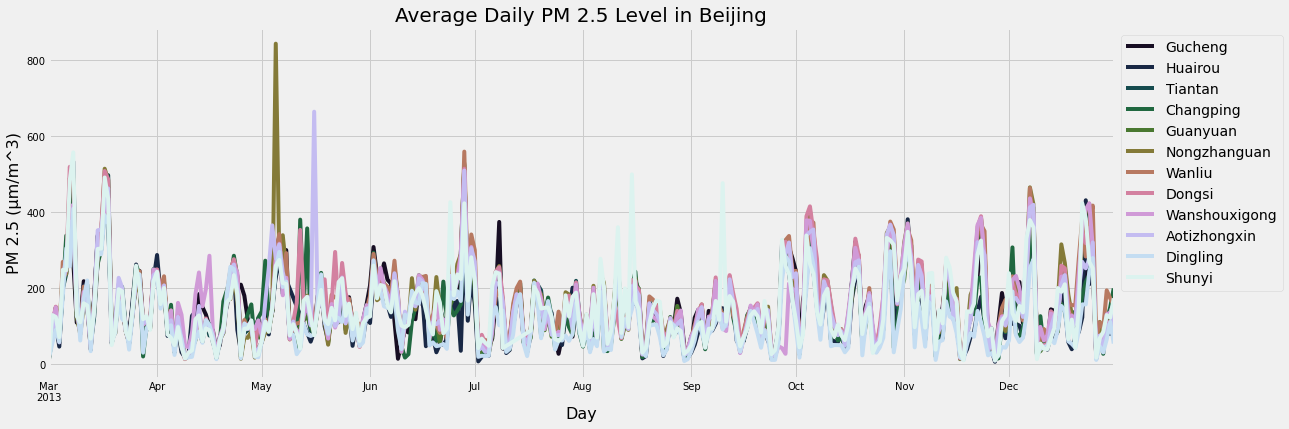

In [137]:
fig, ax = plt.subplots(figsize = (17,6))
for x in df.station.unique():
    df[(df['station'].eq(x)) & ((df['Year'].eq(2013)))]['PM2.5'].resample(rule = 'D').mean().plot(label = x)

ax.legend(loc = 0,bbox_to_anchor = (1,1))
plt.title('Average Daily PM 2.5 Level in Beijing', size = 20)
plt.xlabel('Day', size = 16)
plt.ylabel('PM 2.5 (μm/m^3)', size = 16)
plt.xticks(size = 10)
plt.yticks(size = 10)
#fig.savefig('PNG/PM25_year_station.png', bbox_inches= 'tight', padding_inches = 4, transparent = True)

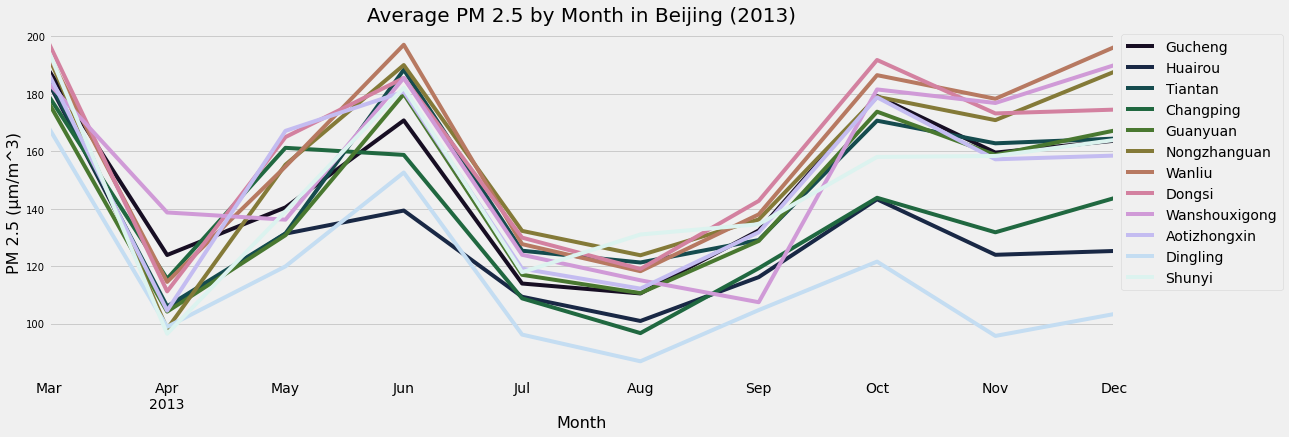

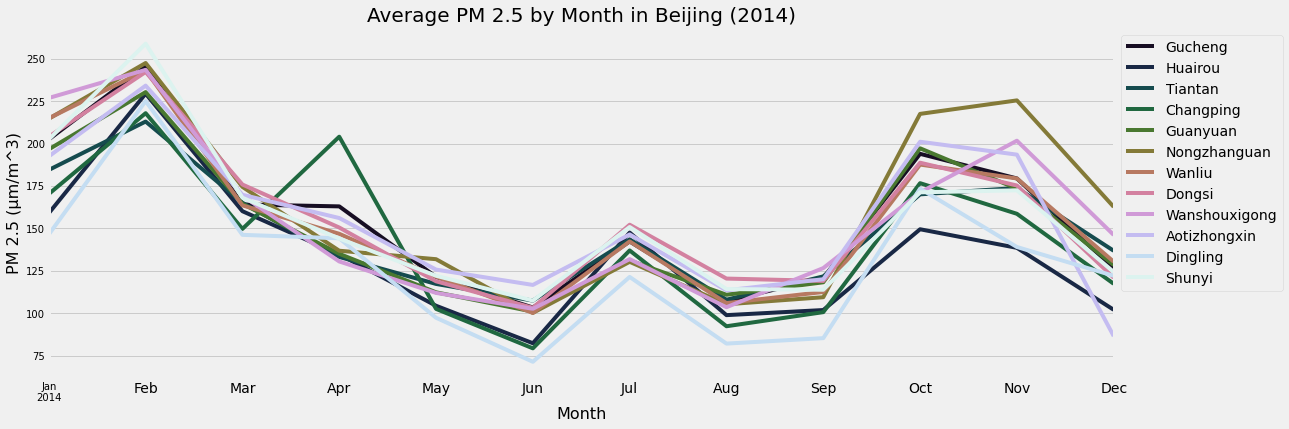

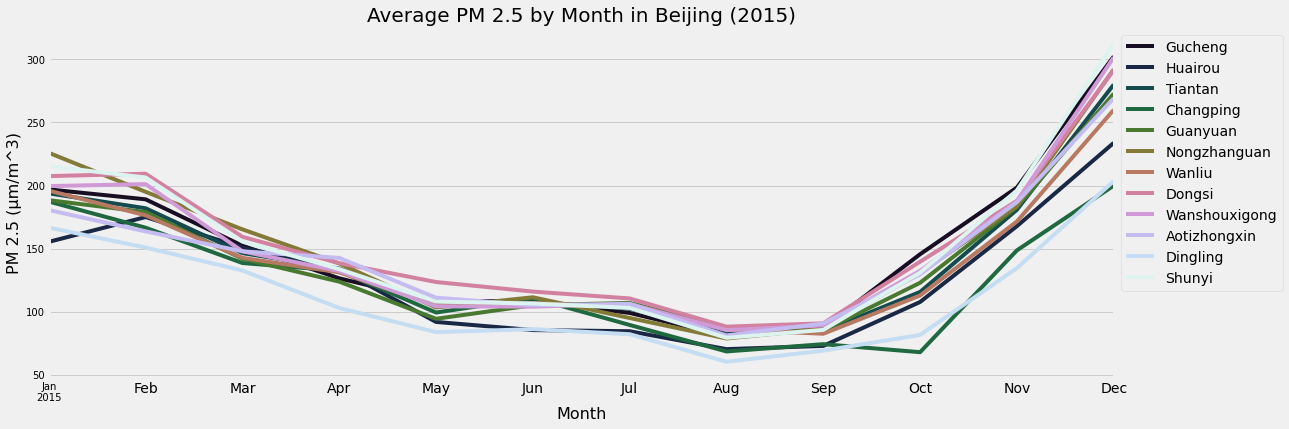

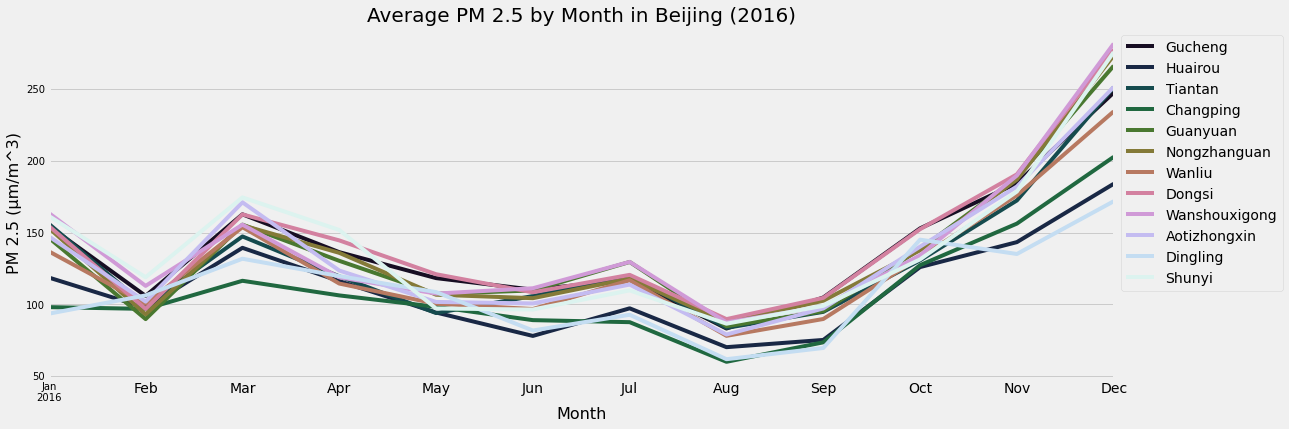

In [139]:
#Average temperature is cyclical


for y in df.Year.unique():
    fig, ax = plt.subplots(figsize = (17,6))
    for x in df.station.unique():
        df[(df['station'].eq(x)) & ((df['Year'].eq(y)))]['PM2.5'].resample(rule = 'M').mean().plot(label = x)
        ax.legend(loc = 0,bbox_to_anchor = (1,1))
        plt.title('Average PM 2.5 by Month in Beijing (' + str(y) +')', size = 20)
        plt.xlabel('Month', size = 16)
        plt.ylabel('PM 2.5 (μm/m^3)', size = 16)
        plt.xticks(size = 10)
        plt.yticks(size = 10)
        #fig.savefig('PNG/PM25_'+str(y)+'_station.png', bbox_inches= 'tight', padding_inches = 4, transparent = True);

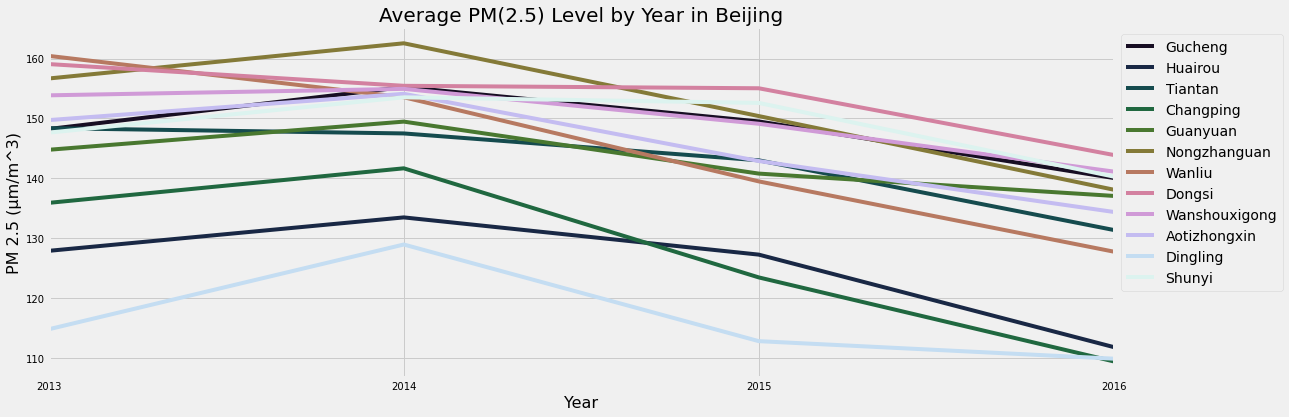

In [140]:
fig, ax = plt.subplots(figsize = (17,6))
for x in df.station.unique():
    df[df['station'].eq(x)]['PM2.5'].resample(rule = 'Y').mean().plot(label = x)

ax.legend(loc = 0,bbox_to_anchor = (1,1))
plt.title('Average PM(2.5) Level by Year in Beijing', size = 20)
plt.xlabel('Year', size = 16)
plt.ylabel('PM 2.5 (μm/m^3)', size = 16)
plt.xticks(size = 10)
plt.yticks(size = 10)

#fig.savefig('PNG/PM25_yearly_station.png', bbox_inches= 'tight', padding_inches = 4, transparent = True)

In [94]:
stations = ['Gucheng',
 'Huairou',
 'Tiantan',
 'Changping',
 'Guanyuan',
 'Nongzhanguan',
 'Wanliu',
 'Dongsi',
 'Wanshouxigong',
 'Aotizhongxin',
 'Dingling',
 'Shunyi']
features = ['PM2.5','log_PM2.5']

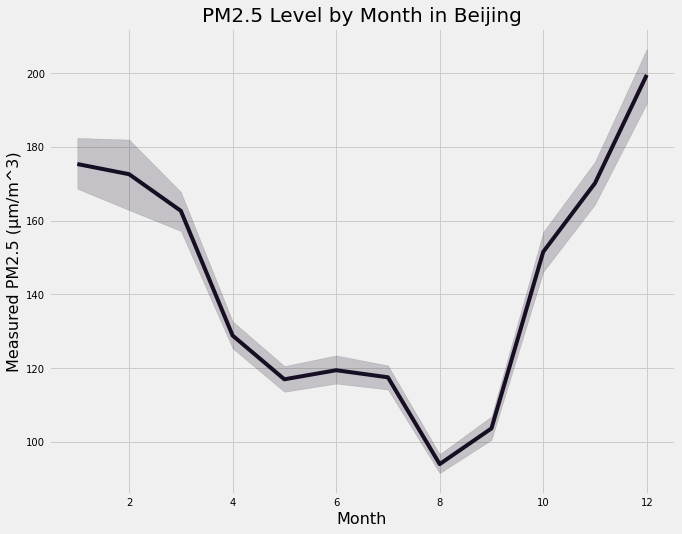

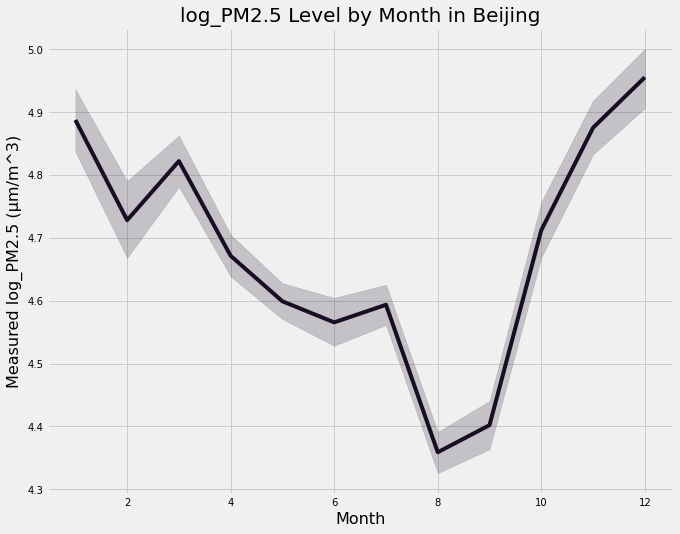

In [141]:
for f in df[features]:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.lineplot(x = 'Month', y = f, data = df);
    plt.title(f + ' Level by Month in Beijing', size = 20)
    plt.xlabel('Month', size = 16)
    plt.ylabel('Measured ' + f+ ' (μm/m^3)', size = 16)
    plt.xticks(size = 10)
    plt.yticks(size = 10)
    #fig.savefig('PNG/'+ f+'_monthly_beijing.png', bbox_inches= 'tight', padding_inches = 4, transparent = True)

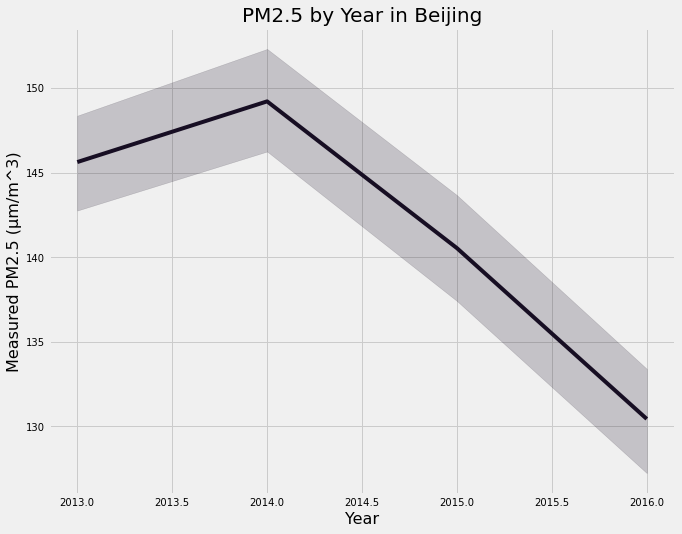

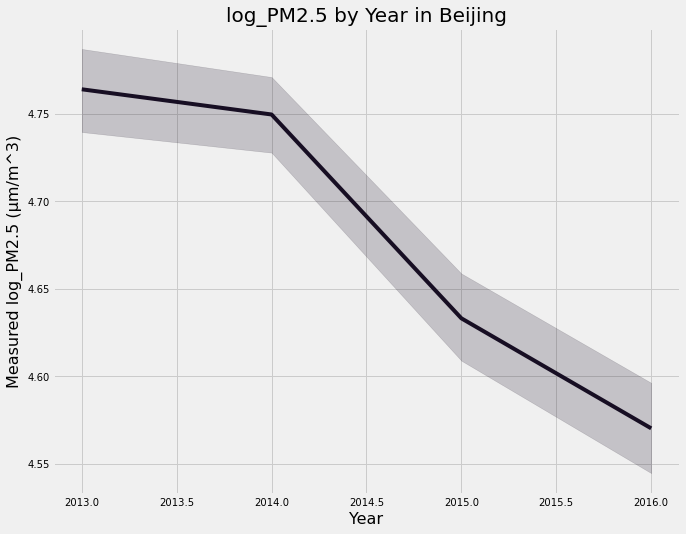

In [142]:
for f in df[features]:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.lineplot(x = 'Year', y = f, data = df);
    plt.title(f + ' by Year in Beijing', size = 20)
    plt.xlabel('Year', size = 16)
    plt.ylabel('Measured ' + f + ' (μm/m^3)', size = 16)
    plt.xticks(size = 10)
    plt.yticks(size = 10)
    fig.savefig('PNG/'+ f+'_yearly_beijing.png', bbox_inches= 'tight', padding_inches = 4, transparent = True)
    


In [124]:
df.describe()

,PM2.5,Month,Year,Day,log_PM2.5
count,16824.000000,16824.000000,16824.000000,16824.000000,16824.000000
mean,141.265335,6.735378,2014.564194,15.748217,4.675614
std,103.839580,3.356575,1.097534,8.809142,0.795374
min,3.000000,1.000000,2013.000000,1.000000,1.098612
25%,67.000000,4.000000,2014.000000,8.000000,4.204693
50%,117.000000,7.000000,2015.000000,16.000000,4.762174
75%,186.000000,10.000000,2016.000000,23.000000,5.225747
max,999.000000,12.000000,2016.000000,31.000000,6.906755


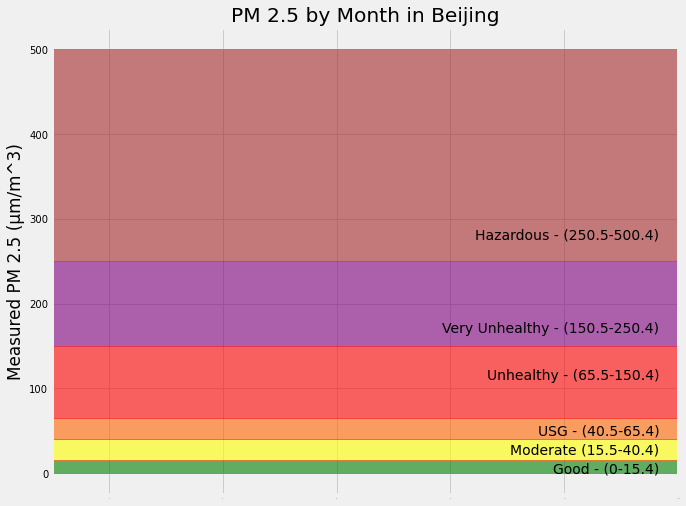

In [156]:


fig, ax = plt.subplots(figsize=(10, 8))

ax.set(
       ylabel='Measured PM 2.5 (μm/m^3)',
       title='PM 2.5 by Month in Beijing',
       xlim=[1, 12])
plt.xticks(size = 0)
plt.yticks(size = 10)
ax.annotate('Good - (0-15.4)',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.07), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('Moderate (15.5-40.4)',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.11), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('USG - (40.5-65.4)',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.15), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('Unhealthy - (65.5-150.4)',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.27), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('Very Unhealthy - (150.5-250.4)',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.37), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('Hazardous - (250.5-500.4)',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.57), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
fill([0,12,12,0], [0,0,15.4,15.4], 'green', alpha=0.6, edgecolor='r')
fill([0,12,12,0], [15.5,15.5,40.4,40.4], 'yellow', alpha=0.6, edgecolor='r')
fill([0,12,12,0], [40.5,40.5,65.4,65.4], '#ff6500', alpha=0.6, edgecolor='r')
fill([0,12,12,0], [65.5,65.5,150.4,150.4], 'red', alpha=0.6, edgecolor='r')
fill([0,12,12,0], [150.5,150.5,250.4,250.4], 'purple', alpha=0.6, edgecolor='r')
fill([0,12,12,0], [250.5,250.5,500.4,500.4], 'brown', alpha=0.6, edgecolor='r')
#fig.savefig('PNG/blank_hazard_level.png', bbox_inches= 'tight', padding_inches = 4, transparent = True)

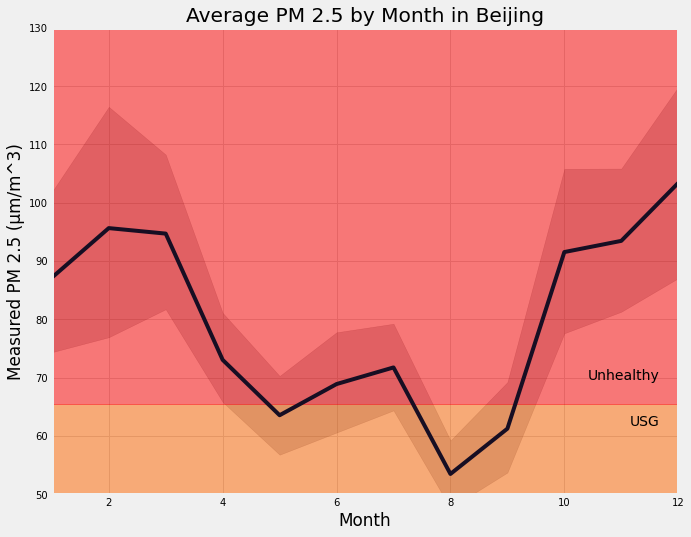

In [163]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(x = 'Month', y = 'PM2.5', data = df);
ax.set(xlabel='Month',
       ylabel='Measured PM 2.5 (μm/m^3)',
       title='Average PM 2.5 by Month in Beijing',
       xlim=[1, 12],ylim=[50,130])
plt.xticks(size = 10)
plt.yticks(size = 10)
ax.annotate('Unhealthy',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.27), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('USG',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.17), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
fill([0,12,12,0], [0,0,15.4,15.4], 'green', alpha=0.5, edgecolor='r')
fill([0,12,12,0], [15.5,15.5,40.4,40.4], 'yellow', alpha=0.5, edgecolor='r')
fill([0,12,12,0], [40.5,40.5,65.4,65.4], '#ff6500', alpha=0.5, edgecolor='r')
fill([0,12,12,0], [65.5,65.5,150.4,150.4], 'red', alpha=0.5, edgecolor='r')
fill([0,12,12,0], [150.5,150.5,250.4,250.4], 'purple', alpha=0.5, edgecolor='r')
fill([0,12,12,0], [250.5,250.5,500.4,500.4], 'brown', alpha=0.5, edgecolor='r')
#fig.savefig('PNG/beijing_hazard_level.png', bbox_inches= 'tight', padding_inches = 4, transparent = True)

In [145]:
df.station.unique()

array(['Gucheng', 'Huairou', 'Tiantan', 'Changping', 'Guanyuan',
       'Nongzhanguan', 'Wanliu', 'Dongsi', 'Wanshouxigong',
       'Aotizhongxin', 'Dingling', 'Shunyi'], dtype=object)

In [146]:
df.head()

,PM2.5,station,Month,Year,Day,log_PM2.5
Date,,,,,,
2013-03-01,16.0,Gucheng,3,2013,1,2.772589
2013-03-02,98.0,Gucheng,3,2013,2,4.584967
2013-03-03,150.0,Gucheng,3,2013,3,5.010635
2013-03-04,83.0,Gucheng,3,2013,4,4.418841
2013-03-05,228.0,Gucheng,3,2013,5,5.429346


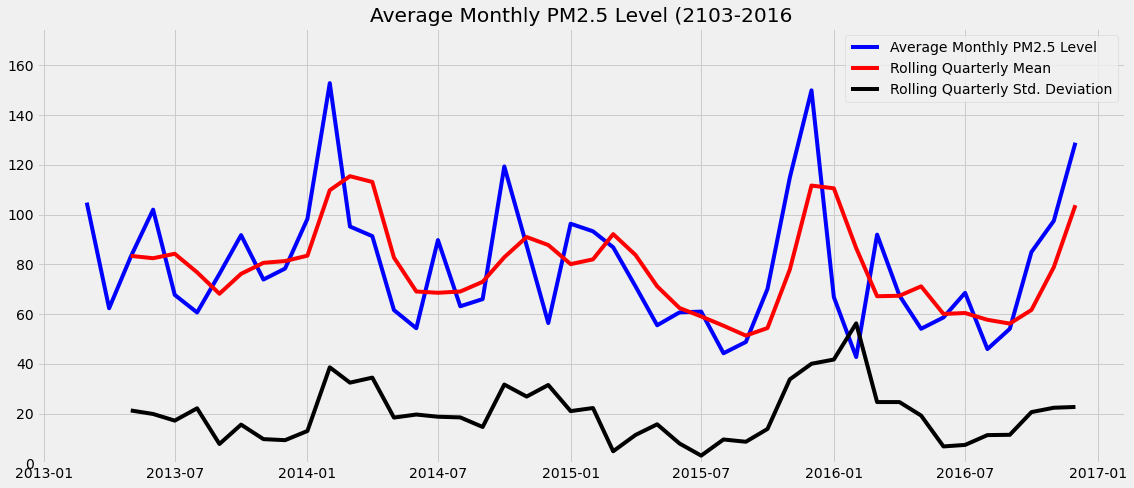

In [151]:
df_ = df['PM2.5'].resample('MS').mean()
#open_monthly_series = df.open

roll_mean = df_.rolling(window = 3).mean()
roll_std = df_.rolling(window = 3).std()


fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(df_, color='blue',label='Average Monthly PM2.5 Level')
ax.plot(roll_mean, color='red', label='Rolling Quarterly Mean')
ax.plot(roll_std, color='black', label='Rolling Quarterly Std. Deviation')

ax.legend(loc = 0,bbox_to_anchor = (1,1))
ax.set_title('Average Monthly PM2.5 Level (2103-2016')
ax.set_ylim((0,175))
fig.tight_layout()
fig.savefig('PNG/rolling_stats.png', bbox_inches= 'tight', padding_inches = 4, transparent = True)

In [128]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['PM2.5'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

(-12.043650900257232, 2.695988588057778e-22, 43, 16780, {'1%': -3.430739767618574, '5%': -2.861712261767962, '10%': -2.566861690548371}, 195891.00407197615)
Results of Dickey-Fuller test: 

Test Statistic                -1.204365e+01
p-value                        2.695989e-22
#Lags Used                     4.300000e+01
Number of Observations Used    1.678000e+04
Critical Value (1%)           -3.430740e+00
Critical Value (5%)           -2.861712e+00
Critical Value (10%)          -2.566862e+00
dtype: float64


In [129]:
df_diff = df[features].diff()

test = adfuller(df_diff['PM2.5'][1:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used',
                                       'Number of Observations Used'])
print(dfoutput)



Test Statistic                   -29.46551
p-value                            0.00000
#Lags Used                        44.00000
Number of Observations Used    16778.00000
dtype: float64


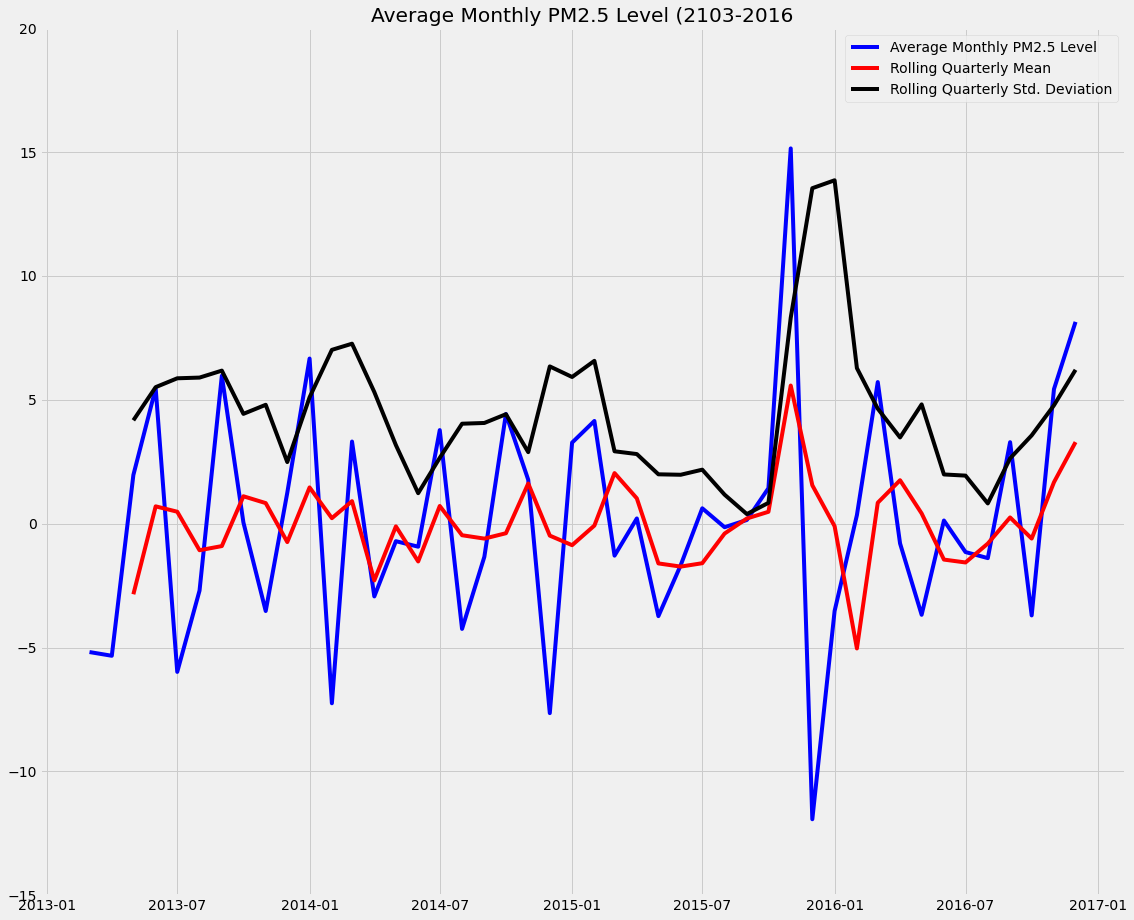

In [130]:
df_ = df_diff['PM2.5'].resample('MS').mean()
#open_monthly_series = df.open

roll_mean = df_.rolling(window = 3).mean()
roll_std = df_.rolling(window = 3).std()


fig, ax = plt.subplots(figsize=(16, 13))
ax.plot(df_, color='blue',label='Average Monthly PM2.5 Level')
ax.plot(roll_mean, color='red', label='Rolling Quarterly Mean')
ax.plot(roll_std, color='black', label='Rolling Quarterly Std. Deviation')
ax.set_ylim(-15, 20)
ax.legend(loc = 0,bbox_to_anchor = (1,1))
ax.set_title('Average Monthly PM2.5 Level (2103-2016')

fig.tight_layout()

In [131]:
df_diff = df[features].diff()

test = adfuller(df_diff['log_PM2.5'][1:])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used',
                                       'Number of Observations Used'])
print(dfoutput)


Test Statistic                   -31.501074
p-value                            0.000000
#Lags Used                        42.000000
Number of Observations Used    16780.000000
dtype: float64


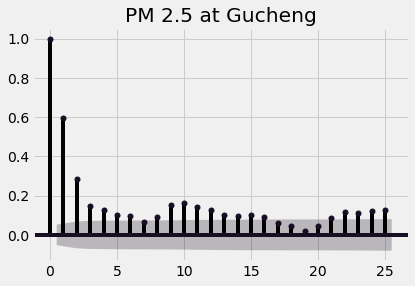

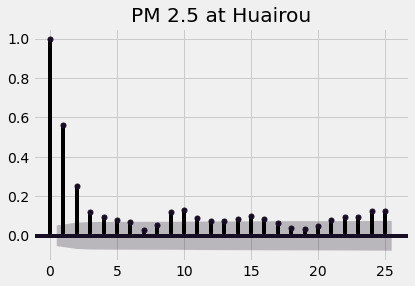

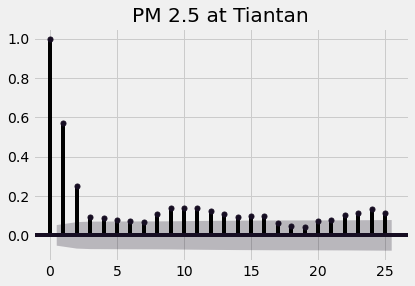

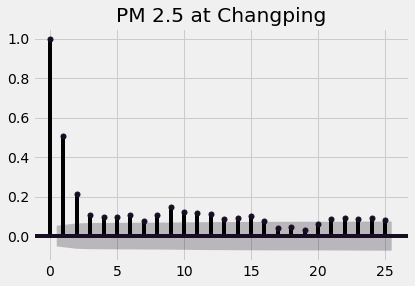

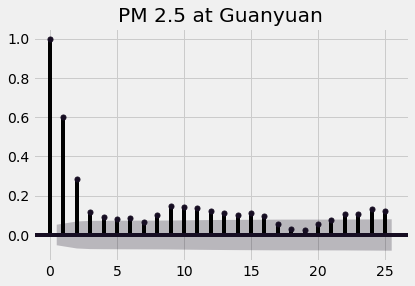

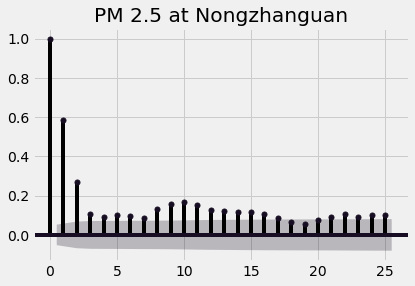

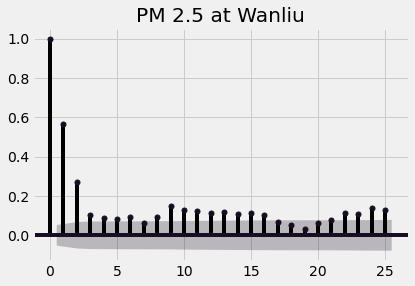

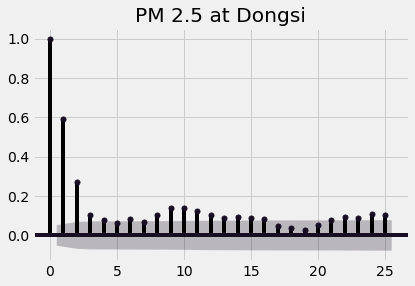

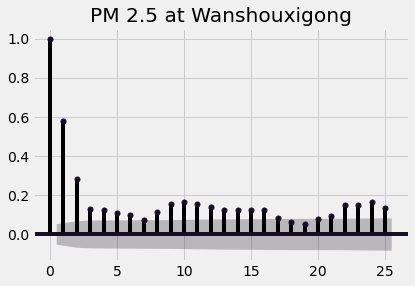

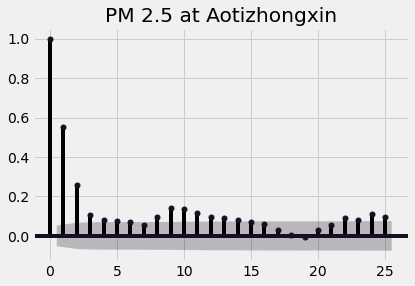

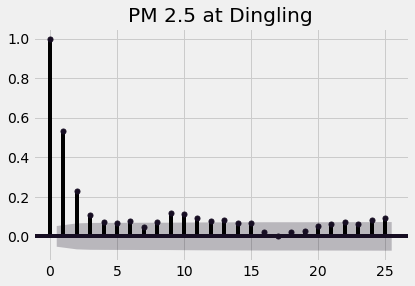

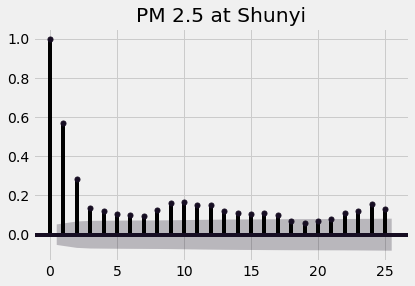

In [132]:
for x in stations:
    plot_acf(df[df['station'].eq(x)]["PM2.5"],lags=25, title = 'PM 2.5 at ' + x)
    plt.show()

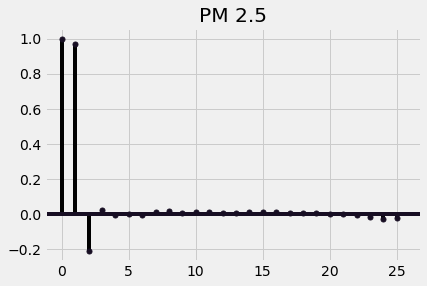

In [37]:
for x in stations:
    plot_acf(df[df['station'].eq(x)]["PM2.5"],lags=25, title = 'PM 2.5 at ' + x)
    plt.show()

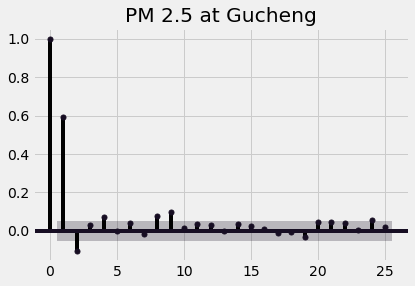

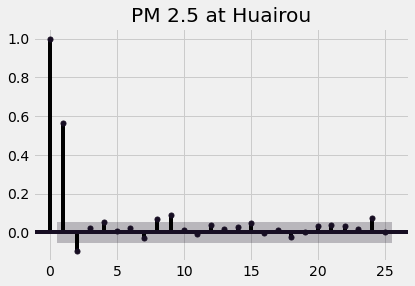

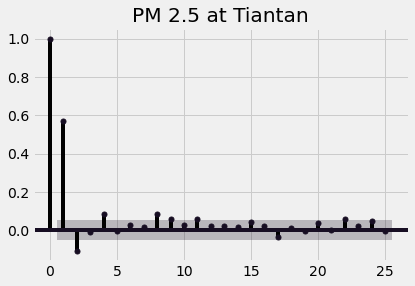

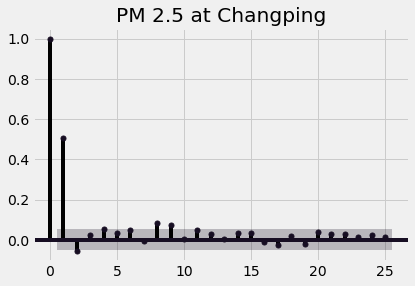

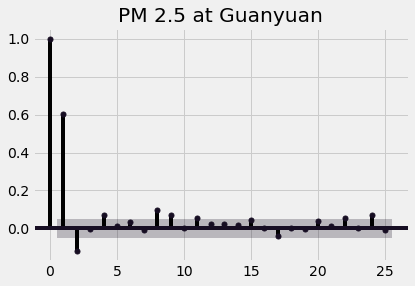

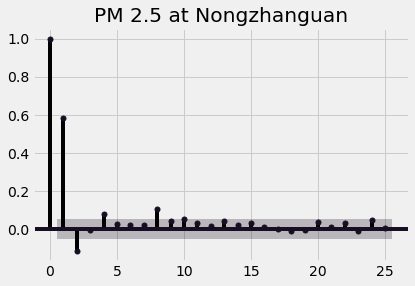

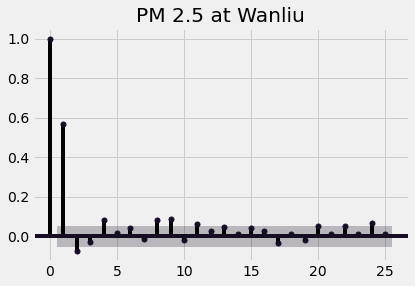

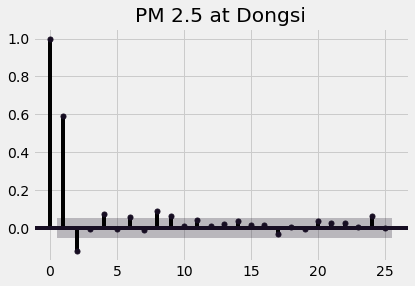

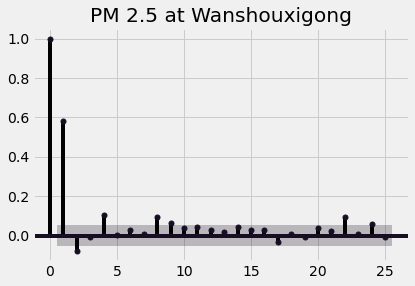

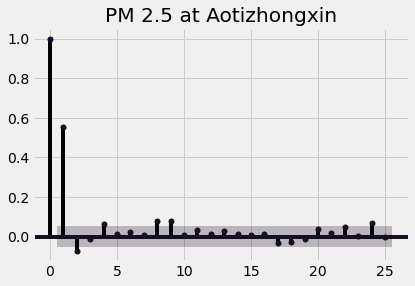

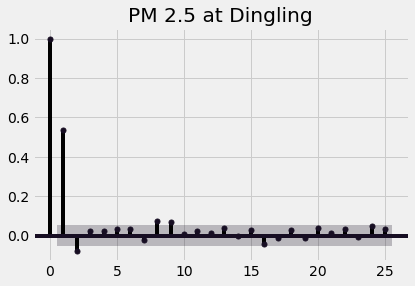

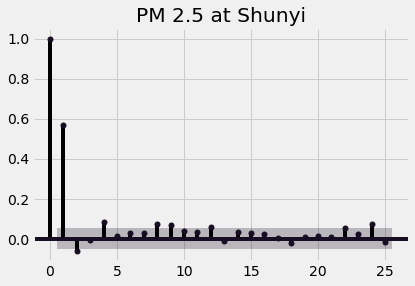

In [133]:
for x in stations:
    plot_pacf(df[df['station'].eq(x)]["PM2.5"],lags=25, title = 'PM 2.5 at ' + x)
    plt.show()

In [134]:
for x in stations:
    plot_pacf(df[df['station'].eq(x)]["RAIN"],lags=25, title = 'Rain at ' + x)
    plt.show()



KeyError: 'RAIN'